## `Main steps` :

1. Look at big picture
2. Get the data
3. Discover and visualize the data to gain analytics
4. Prepare data for ML
5. Select a model and train it
6. Fine tune the model
7. Present solution
8. Launch, monitor and maintain the system

## Housing price prediction

### `Big Picture` 
> Model should learn form the data given and be able to predict median housing price in any distict, given other metrics

> This is a supervised regression task since we have labeled training examples and we are predicting a continuous value.

> This is univariate regression - trying to predict single value for each district. This is a multiple regression problem as we use many features for predicting

> There is no continuous flow of data coming in the system, so no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

> Select a performance measure : As it is regression, RSME and MAE. MAE is useful when there are many outliers

> Check the assumptione: If the next team considers prices into categories, then the model needs to be classification and focus on predicting the right category rather than predicting right number

### `Get the data`
> In typical environments your data would be available in a relational database (or some other common datastore) and spread across multiple tables/documents/files. To access it, you would first need to get your credentials and access authorizations,10 and familiarize yourself with the data schema

> In this project, simple csv file contains all the data

In [1]:
import pandas as pd
housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### `info()` 
info method is useful to get quick description of data - total rows, attribute type, number of non-null values

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> There are 20,640 instances in the dataset and total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. 

> All attributes are numerical, except the ocean_proximity field. `value_counts()` method is used to find how many districts belong to each category.

In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### `describe()`
describe method shows a summary of numerical attributes

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> 25% of the districts have a housing_median_age lower than 18

> 50% are lower than 29

> 75% are lower than 37.

#### `hist()` 
A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

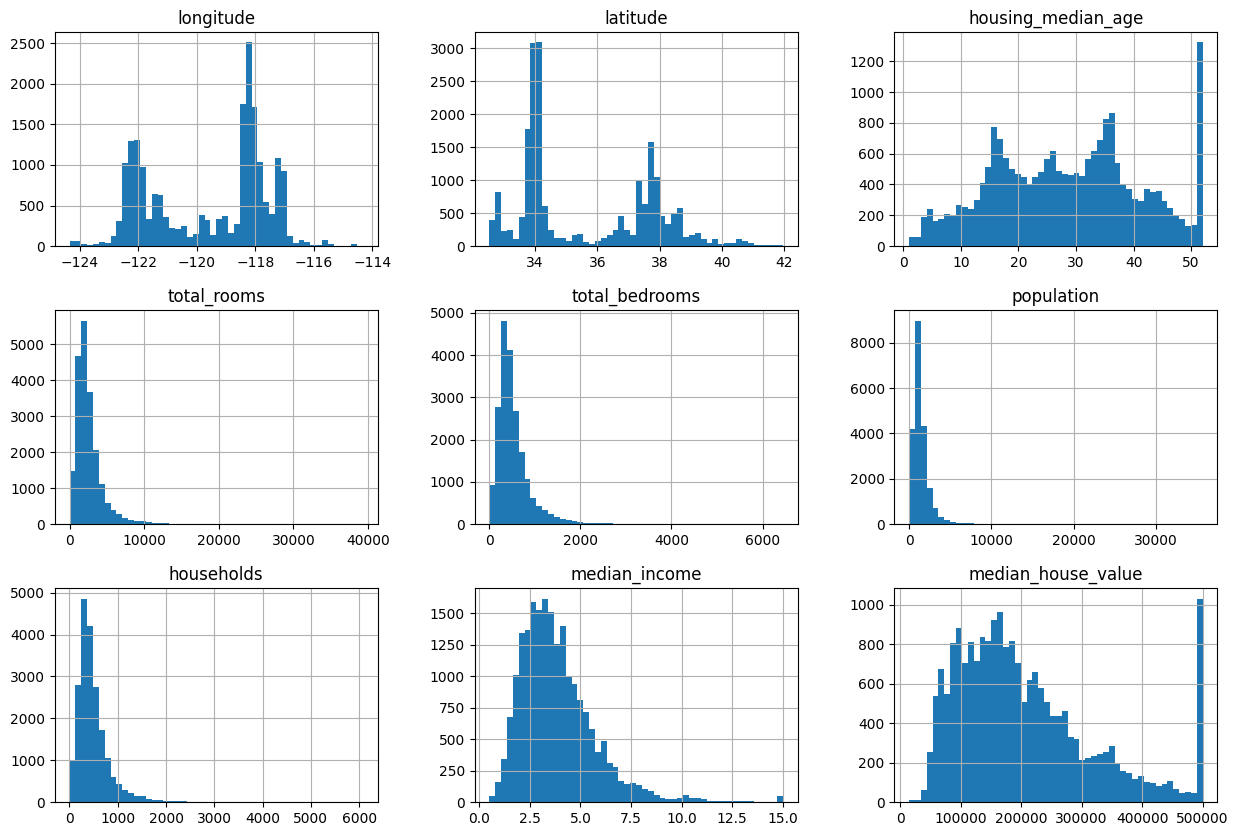

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(15,10))
plt.show()

> After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000).

> The housing median age and the median house value were also capped. This is a serious problem as machine may think prices can never go beyond 500000. So either collect proper data for the capped ones or remove the capped ata from training set and test set since your system should not be evaluated poorly if it predicts values beyond $500,000

> Attributes have different scales

> Many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. try transforming these attributes to have more bell-shaped distributions.

### `Create Test Set`

> If you look at the test set, you may stumble upon some seemingly
interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

> Random sampling can introduce sampling bias. So, stratified sampling is used.
After reaching out to the experts, we understand median house income is important metric. So we will stratify wrt house income. Since it is continuous, we need to bin it into categories for stratifiyng. 

In [6]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

#cut function is used to separate array elemenys into different bins
#bins : 0 to 1.5 will be 1, 1.5 to 3 willbe 2 ..... 6 to max in data will be 5

<AxesSubplot: >

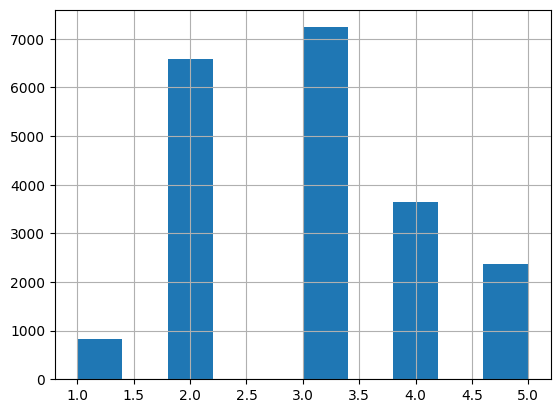

In [7]:
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42,stratify=housing["income_cat"])
test_set["income_cat"].value_counts()/len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [9]:
#remove the income_cat attribute so data is back to original state
for set_ in (train_set,test_set):
    set_.drop("income_cat",axis=1,inplace=True)

### `Data Insights`

#### `Visualizing Geographical Data`

> scatter plot is useful in this. use alpha for finding hih density regions

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

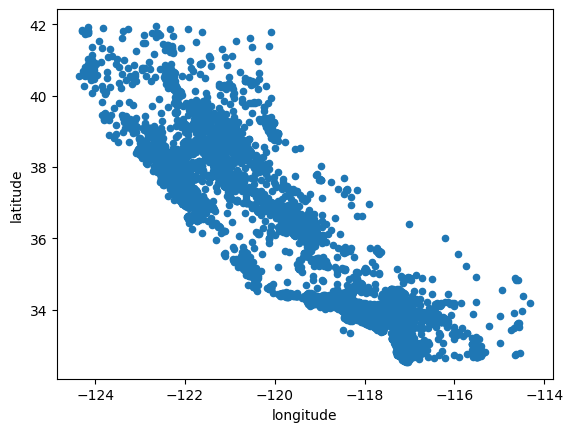

In [10]:
train_set.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

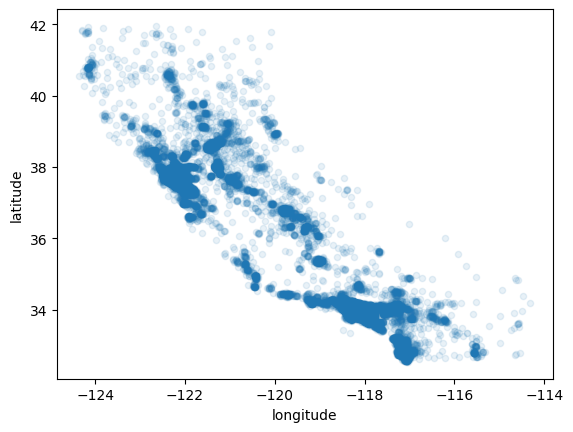

In [11]:
train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

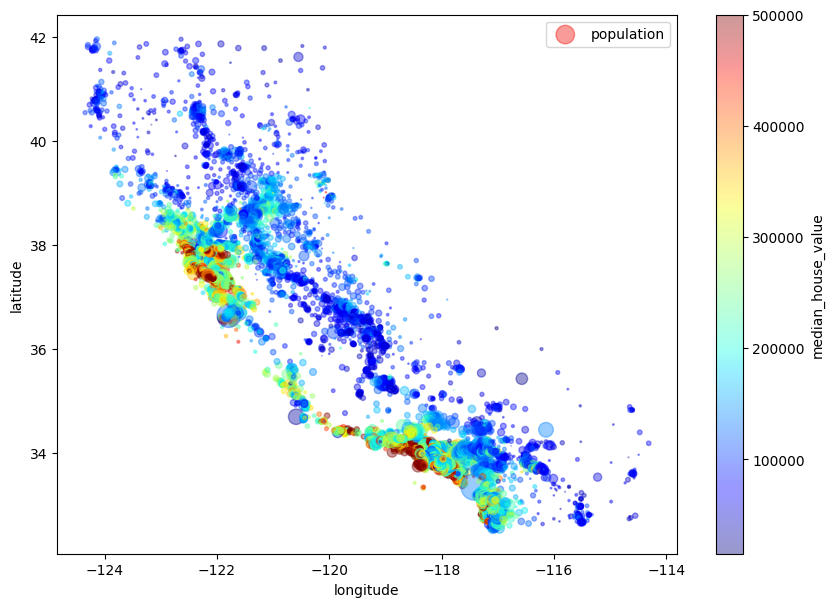

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density

#### `Correlation`
> To find out relationship bewteen each parameters

> value ranges from +1 to -1 

In [13]:
corr_matrix=train_set.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [14]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
erally goes up”).

`pandas.plot.scatter_matrix` is useful for seeing correlations visually

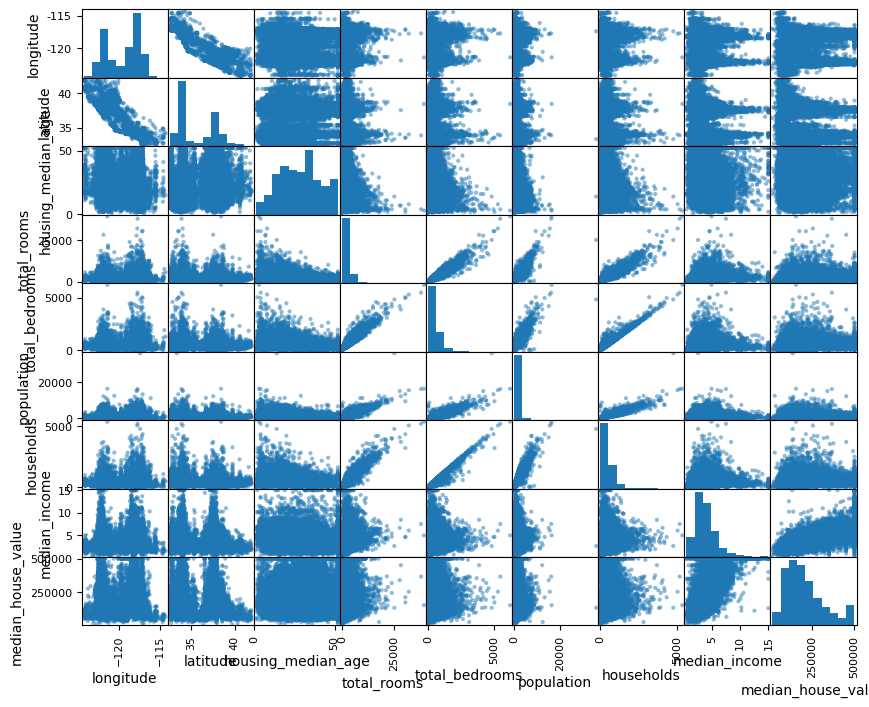

In [15]:
from pandas.plotting import scatter_matrix
attr=train_set.drop("ocean_proximity",axis=1)
scatter_matrix(attr,figsize=(10,8))
plt.show()

Since we are predicting house value, look at the house value column. Median income is showing  a linear relationship. so we can focus on this

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

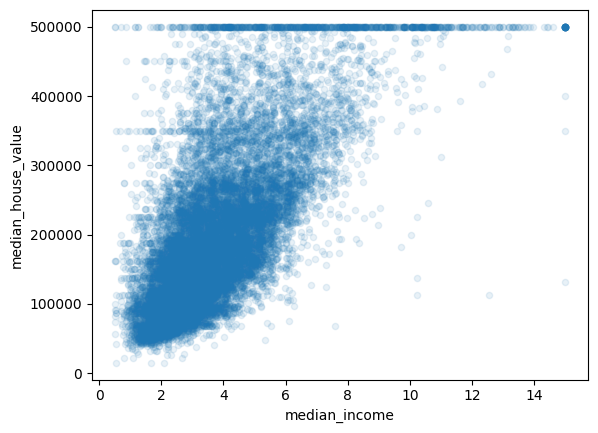

In [16]:
train_set.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

> the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

> the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that. try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks

#### `Experimenting with attribute combinations`
> the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household.

> the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.

> population per household also seems like an interesting attribute combination to look at

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

> The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. 

> The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.


### `Prepare data for ML algorithns`

> Most ML algo cannot work with missing features. So you can 
1. Get rid of corresponding records
2. Get rid of whole attribute
3. Set the zero values to mean or median (careful. zero values may suggest something depending on the feature)

compute the median value on the training set, and
use it to fill the missing values in the training set, but also don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

In [18]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467


ML cannot handle text data. so drop it and encode the text data.
With help of sklearn imputer, we can compute mean/median and replace null values with it

In [20]:
train_label=train_set["median_house_value"]
train_set=train_set.drop("median_house_value",axis=1)

In [21]:
train_set_num=train_set.drop("ocean_proximity",axis=1)
train_set_cat=train_set[["ocean_proximity"]] #one hot needed 2d. So 2d form here
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(train_set_num)
X=imputer.transform(train_set_num)

# X will be a simple numpy array. So, put it into a dataframe
new_train_set_num=pd.DataFrame(X,columns=train_set_num.columns)

##### `Ordinal encoding`
> adv: requires less memory. 

> Disadv: assume that two nearby values are more similar than two distant values. Ordering/Ranking will be considered and bias will be introduced.

##### `One hot encoding` 
> adv: creates one binary attribute per category. Hence no ranking

> disadv: if number of categories are large, will take up more space

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
new_train_set_cat=encoder.fit_transform(train_set_cat)

one hot encoding uses a sparse matrix only stores the location of the non‐zero elements


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room,
set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.

#### `Feature Scaling`

Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. Two ways:

> Min max scaling/normalisation: values are shifted and rescaled to range between 0 and 1. 

> Stadardization: no defined range. makes mean as zero and unit variance. Much less affected from outliers. Ex: suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0-15 down to 0-0.15, whereas standardization would not be much affected. 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

housing_num_tr = num_pipeline.fit_transform(new_train_set_num)

#### `Pipelines`
The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers. This helps in maintaining order of the steps executed. 

#### `ColumnTransformer`
single transformer handles all columns by applying the appropriate transformations to each column.

`note`- OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. 

In [25]:
from sklearn.compose import ColumnTransformer

num_attribs = list(new_train_set_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])

housing_prepared = full_pipeline.fit_transform(train_set)

### `Selecting a model`
> selected linear regression and considered as baseline performance for comparing with other methods

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,train_label)

LinearRegression()

### `Perfromance metrics`
> RMSE/MAE

In [27]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(train_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

not a great score: most districts' median_housing_values range between 120,000 and 265,000, so a typical prediction error of 68627 is not very satisfying

#### `Cross validation score` 
For better evaluation as training data is split into many folds and each folds are tested. Helps in finding errors in prediction for a particular group of data

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, train_label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())

69104.07998247063
2880.3282098180694


`note`: Scikit-Learn's cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root

#### `Saving the model`
> save the model. use this while using earlystopping for preventing overfitting of models. 

> Can use either pickle or joblib. Joblib is eficient at serializing large Numpy arrays.

In [29]:
import joblib

joblib.dump(lin_reg,"lin_model.pkl")

model_load=joblib.load("lin_model.pkl")

#### `Evaluating model for test set`
> Do this at the last. Only when satisfied during train and validation.

In [30]:
x_test=test_set.drop("median_house_value",axis=1)
y_test=test_set["median_house_value"]

x_test_prepared=full_pipeline.transform(x_test)

pred=model_load.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, pred)
final_rmse = np.sqrt(final_mse)
final_rmse

66913.4419132093

In [31]:
from scipy import stats
confidence = 0.95
squared_errors = (pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))


array([64745.05883062, 69013.7288832 ])

#### `Fine tuning`

Use grid search for searching the best parameters in other algorithms like trees